In [63]:
#1.Basic Data Preprocessing For GenAI
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data=np.random.randint(0,255,(10,2))
print('Original data is :-\n',data)

scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(data)
print('Transformed Scaled data is :- \n',data_scaled)


Original data is :-
 [[ 65  90]
 [ 63 247]
 [ 66  19]
 [238 222]
 [ 70 193]
 [158 238]
 [172 151]
 [156  14]
 [199 155]
 [140  82]]
Transformed Scaled data is :- 
 [[0.01142857 0.32618026]
 [0.         1.        ]
 [0.01714286 0.02145923]
 [1.         0.89270386]
 [0.04       0.76824034]
 [0.54285714 0.96137339]
 [0.62285714 0.58798283]
 [0.53142857 0.        ]
 [0.77714286 0.60515021]
 [0.44       0.29184549]]


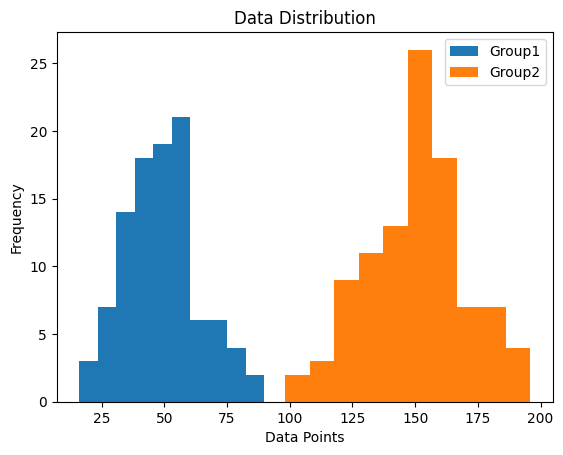

In [64]:
#Visualizing Data Distribution for GenAI
import matplotlib.pyplot as plt
import numpy as np

data1=np.random.normal(loc=50,scale=15,size=100)
data2=np.random.normal(loc=150,scale=20,size=100)

plt.hist(data1,label='Group1')
plt.hist(data2,label='Group2')
plt.title('Data Distribution')
plt.xlabel('Data Points')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [65]:
#TensorFlow Computation Graph with Eager Execution
import tensorflow as tf

a=tf.constant([3,5])
b=tf.constant([4,7])
c=a+b
print('Eager Execution output is :- ',c.numpy())

@tf.function
def multiply(x,y):
    return x*y

result=multiply(a,b)
print('Output of Graph Mode is:-',result)

Eager Execution output is :-  [ 7 12]
Output of Graph Mode is:- tf.Tensor([12 35], shape=(2,), dtype=int32)


In [66]:
#4.Word2Vec Embeddings
from gensim.models import Word2Vec

sentence=[['He','is','a','boy','his','name','is','Om']]
model=Word2Vec(sentence,window=4,min_count=1,vector_size=5,sg=100)

print('Vectors for word he :- ',model.wv['He'])
print('Similar words to He :- \n',model.wv.most_similar('He'))
print('Similar words to He :- \n',model.wv.similarity('He','his'))
                                        


Vectors for word he :-  [-0.15023164 -0.01860085  0.19076237 -0.14638333 -0.04667537]
Similar words to He :- 
 [('a', 0.9323886632919312), ('Om', 0.8512495160102844), ('his', 0.5485532283782959), ('is', 0.041110213845968246), ('boy', -0.08409640938043594), ('name', -0.7751493453979492)]
Similar words to He :- 
 0.54855317


In [67]:
#5.Glove Pretrained Embeddings

import gensim.downloader as api
model=api.load('glove-wiki-gigaword-50')
print('\nEmbeddings similar for word car\n\n\t',model['car'])
print('\nSimilarity between words car & vehicle \n\n\t',model.similarity('car','vehicle'))
print('\nSimilar words to Car :- \n\n\t',model.most_similar('car'))



Embeddings similar for word car

	 [ 0.47685  -0.084552  1.4641    0.047017  0.14686   0.5082   -1.2228
 -0.22607   0.19306  -0.29756   0.20599  -0.71284  -1.6288    0.17096
  0.74797  -0.061943 -0.65766   1.3786   -0.68043  -1.7551    0.58319
  0.25157  -1.2114    0.81343   0.094825 -1.6819   -0.64498   0.6322
  1.1211    0.16112   2.5379    0.24852  -0.26816   0.32818   1.2916
  0.23548   0.61465  -0.1344   -0.13237   0.27398  -0.11821   0.1354
  0.074306 -0.61951   0.45472  -0.30318  -0.21883  -0.56054   1.1177
 -0.36595 ]

Similarity between words car & vehicle 

	 0.88336843

Similar words to Car :- 

	 [('truck', 0.92085862159729), ('cars', 0.8870189785957336), ('vehicle', 0.8833683729171753), ('driver', 0.8464019298553467), ('driving', 0.8384189009666443), ('bus', 0.8210511803627014), ('vehicles', 0.8174992799758911), ('parked', 0.7902189493179321), ('motorcycle', 0.7866503000259399), ('taxi', 0.7833929657936096)]


In [68]:
#6. BERT Embeddings with Transformers

from transformers import BertTokenizer,BertModel

tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
model=BertModel.from_pretrained('bert-base-uncased')

input=tokenizer('GenAI can create realistic images',return_tensors='pt')
output=model(**input)

print('Shape of the embedding is :- ',output.last_hidden_state.shape)
print('First Embeddings is :=',output.last_hidden_state[0][0][:5])


Shape of the embedding is :-  torch.Size([1, 8, 768])
First Embeddings is := tensor([-0.2575, -0.0845,  0.0482,  0.0268, -0.4547], grad_fn=<SliceBackward0>)


In [69]:
#7. FAISS Similarity Search
!pip install faiss-cpu

import faiss
import numpy as np

data=np.random.random((5,4)).astype('float32')
index=faiss.IndexFlatL2(4)
index.add(data)

query=np.random.random((1,4)).astype('float32')
distances,indices=index.search(query,k=5)

print('Query is',query)
print('Index is',indices)
print('Distances',distances)

Query is [[0.5508896  0.14643094 0.64752346 0.4217598 ]]
Index is [[4 2 1 0 3]]
Distances [[0.25233498 0.25818256 0.27142555 0.5753962  0.65599185]]


In [70]:
#8. Self-Attention Mechanism
import torch
import torch.nn.functional as F

x = torch.rand(1, 3, 4)
Q, K, V = x, x, x

scores = torch.matmul(Q, K.transpose(-2, -1)) / (4 ** 0.5)
weights = F.softmax(scores, dim=-1)
output = torch.matmul(weights, V)

print("Attention Weights:", weights)
print("Output:", output)


Attention Weights: tensor([[[0.3186, 0.3585, 0.3229],
         [0.2507, 0.4324, 0.3169],
         [0.2534, 0.3558, 0.3909]]])
Output: tensor([[[0.5232, 0.3599, 0.4587, 0.4735],
         [0.5742, 0.3828, 0.4523, 0.5071],
         [0.5742, 0.3462, 0.4869, 0.4617]]])


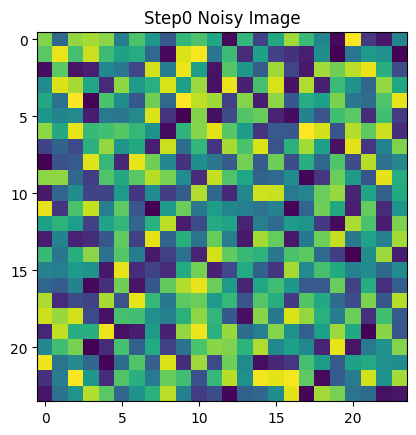

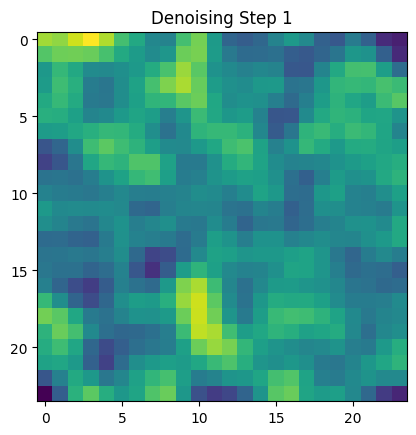

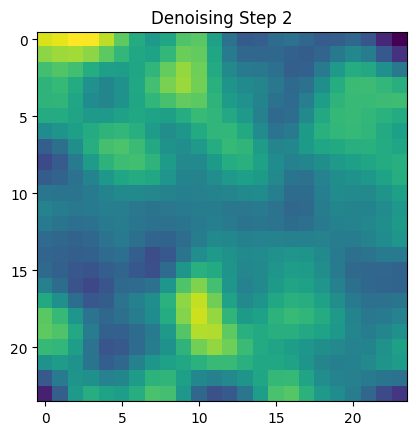

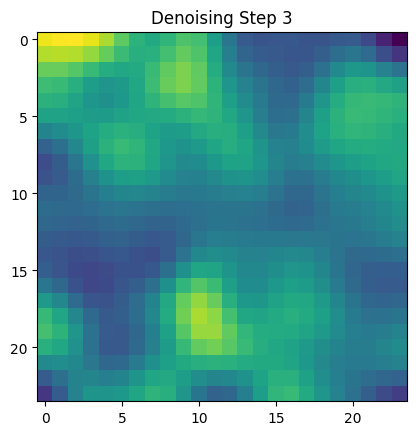

In [71]:
#9. Simulating Diffusion Denoising
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

image=np.random.rand(24,24)
plt.imshow(image)
plt.title('Step0 Noisy Image')
plt.show()

for step in range(1,4):
    image=gaussian_filter(image,sigma=1)
    plt.imshow(image)
    plt.title(f'Denoising Step {step}')
    plt.show()

In [76]:
#10. FID Calculation 
from scipy.linalg import sqrtm
import numpy as np

def calculate_fid(mu1, sigma1, mu2, sigma2):
    diff = mu1 - mu2
    covmean = sqrtm(sigma1.dot(sigma2))
    fid = diff.dot(diff) + np.trace(sigma1 + sigma2 - 2 * covmean)
    return np.real(fid)

mu1, sigma1 = np.random.rand(3), np.eye(3)
mu2, sigma2 = np.random.rand(3), np.eye(3)

print("FID Score:", calculate_fid(mu1, sigma1, mu2, sigma2))



FID Score: 0.7399305859773464
